# 1D Fourier-sor

Valamely folytonos periódusos $f(t)$ függvény trigonometrikus alaprendszer szerinti $N$-edrendű közelítése komplex együtthatókkal felírva

$$f_N(t)=\sum_{n=-N}^{N} c_n e^{i n \omega_0 t}$$

ahol a Fourier együtthatók

$$c_n = \frac{1}{T} \int_{t_0}^{t_0+T} f(t) e^{-i n \omega_0 t}$$

egy teljes $T$ periódusra történő integrálással határozhatók meg. Az összefüggésben $\omega_0$ az alapfrekvenciát jelöli ($\omega_0 = \frac{2 \pi}{T}$).

Ezeket a következő, [SymPy](http://www.sympy.org) szimbolikus algebrai számításokra kifejlesztett Python könyvtárat használó függvényekkel definiálhatjuk:

In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

i2pi = sympy.I*2*sympy.pi
exp = sympy.exp

def fN(N):
    return sum(c(n)*exp(i2pi*n*t/T) for n in range(-N, N+1)).expand(complex=True).simplify()

def c(n):
    return (sympy.integrate(
               f(t)*exp((-i2pi * n * t)/T), 
               (t, t0, t0 + T))/T)

### Fűrészfog

Példaként határozzuk meg a 'fűrészfog' függvény 1D Fourier-sorát.

Definiáljuk az `f(t)` függvényt és a periódusát

In [2]:
def f(t):
    return t

T = 20
t0 = 0

t = sympy.Symbol('t', real=True)

Írjuk fel a Fourier-sorát $N=6$-ig

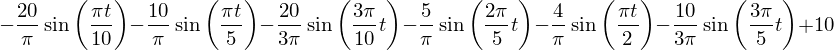

In [3]:
N = 6

analytic_approx = fN(N).expand()
analytic_approx

A függvényt csak  $y=t$ formában definiáltuk, mert a Fourier-sorfejtés mindig periódusos függvényt elemez. Láthatjuk azt, hogyan közelítette a függvényt a megadott $T$ perióduson, ha felrajzoljuk a közelítést nagyobb $t$ intervallumra.

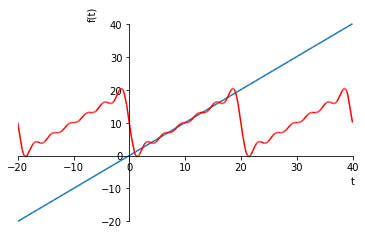

In [4]:
interval = (t, t0-T, t0+2*T)
p1 = sympy.plot(f(t), interval, show=False)
p2 = sympy.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

A szimbolikus megoldás helyett a numerikusan egyenértékű közelítő megoldást is előállíthatjuk a SymPy `mpmath` moduljával.

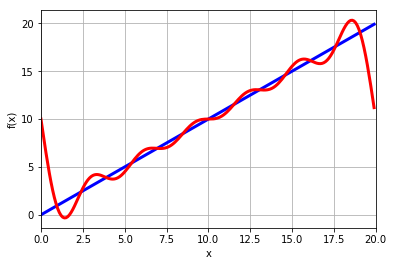

In [6]:
import mpmath

cs = mpmath.fourier(f, [t0, t0+T], N)

def numeric_approx(t):
    return mpmath.fourierval(cs, [t0, t0+T], t)

mpmath.plot([f, numeric_approx], [t0, t0+T])

Az mpmath.fourier függvénnyel kiszámított együtthatók az $f_N$ függvény koszinusz és szinusz együtthatói.

$$f_N(t) = \sum_{n=0}^N \left(a_n \cos\left(\frac{2\pi nt}{T}\right) + b_n \sin\left(\frac{2\pi nt}{T}\right)\right)$$

Láthatjuk a hasonlóságot, ha kiszámoljuk az előzőleg szimbolikusan kapott kifejezést, és összevetjük a most kapott eredménnyel:

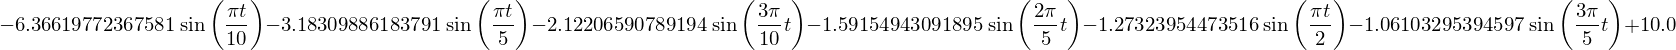

In [7]:
sympy.N(analytic_approx)

In [8]:
cs

([mpf('10.0'),
  mpf('0.0'),
  mpf('0.0'),
  mpf('0.0'),
  mpf('0.0'),
  mpf('0.0'),
  mpf('0.0')],
 [mpf('0.0'),
  mpf('-6.366197723675814'),
  mpf('-3.183098861837907'),
  mpf('-2.1220659078919377'),
  mpf('-1.5915494309189535'),
  mpf('-1.2732395447351628'),
  mpf('-1.0610329539459689')])

Csak szinuszos együtthatók vannak, mivel a függvényünk páratlan.